In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../../')

In [3]:
from IPython.display import display, HTML
import pandas as pd
from os import listdir
from os.path import isfile, join
from pprint import pprint
from tqdm import tqdm
import json
import io

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties
import numpy as np

import transformer_anatomy
from transformer_anatomy.utils import get_results

sns.set(style="ticks")
plt.rcParams['axes.facecolor']='white'
task_order = ['Length',  'WordContent', 'Depth', 'TopConstituents', 'SubjNumber', 'ObjNumber', 'BigramShift', 'CoordinationInversion', 'OddManOut', 'Tense']
dict_task = {0:'Length',  1:'WordContent', 2:'Depth', 3:'TopConstituents', 4:'BigramShift', 5:'Tense', 6:'SubjNumber', 7:'ObjNumber', 8:'OddManOut', 9:'CoordinationInversion'}

In [2]:
result_dir_path = '../../results'

def get_results(dir_path='./mlp_results'):
    columns = ['data_path', 'cache_path', 'result_path', 'batch_size', 'cbatch_size', 'nhid', 'optim', 'kfold', 'tenacity', 'usepytorch', 'epoch_size', 'device']
    filenames = [f for f in listdir(dir_path) if isfile(join(dir_path, f)) if '.json' in f]
    list_result = []
    for filename in filenames:
        with open(join(dir_path, filename), 'r') as infile:
#             print(filename)
            results = json.load(infile)
            for key, result in results.items():
                list_result.append(result)
                
    df = pd.DataFrame(list_result)[['acc', 'head', 'layer', 'task', 'model_name', 'location', 'devacc']]
    
    for column in columns:
        try:
            df = df.drop(columns=column)
        except:
            pass

    return df

# Layer-Task Peformance Chart

In [6]:

df1 = get_results(dir_path=join(result_dir_path, './results/fine_mlp_results'))
df1['classifier'] = 'fine'
df2 = get_results(dir_path='./results/mlp_results')
df2['classifier'] = 'coarse'
df1 = df1.append(df2)

df1 = df1.loc[df1['head'] == -1]
df1.loc[df1['model_name'] == 'bert-base-uncased', 'layer'] *= 100 / 12
df1.loc[df1['model_name'] == 'bert-large-uncased', 'layer'] *= 100 / 24


# df = df.loc[df['model_name'] == 'bert-base-uncased']
g = sns.relplot(x='layer', y="acc", col='task', col_wrap=5, style='classifier', col_order=task_order, hue='model_name', kind="line", legend="full", data=df1, facet_kws={'sharey':False, 'sharex':False}) #col_wrap=3
for ax in g.axes.flatten():
    ax.grid(True)
#     ax.set_ylim(0, 100)

FileNotFoundError: [Errno 2] No such file or directory: '../../results/./results/fine_mlp_results'

In [7]:
df = get_results(dir_path='./linear_head_wise_results')
large_bert = df.loc[df['model_name'] == 'bert-large-uncased']
# large_bert = large_bert.loc[large_bert['head'] == 2]
large_bert = large_bert[['acc', 'head', 'layer', 'task', 'model_name']]
# display(large_bert)
# large_bert = large_bert.pivot(index='layer', columns='task', values=['acc'])
g = sns.relplot(x='layer', y="acc", col='task', col_wrap=5, col_order=task_order, hue='head', kind="line", legend="full", data=large_bert, facet_kws={'sharey':False, 'sharex':False}) #col_wrap=3


FileNotFoundError: [Errno 2] No such file or directory: './linear_head_wise_results'

# Layer-Task Performance Table

In [1]:
df = get_results(dir_path=join(result_dir_path, 'linear_head_wise_results'))
large_bert = df.loc[df['model_name'] == 'bert-base-uncased']
large_bert = large_bert.loc[large_bert['head'] == 2]
large_bert = large_bert.pivot(index='layer', columns='task', values=['acc'])


large_bert.columns = large_bert.columns.droplevel()
large_bert = large_bert[['Length',  'WordContent', 'Depth', 'TopConstituents', 'BigramShift', 'Tense', 'SubjNumber', 'ObjNumber', 'OddManOut', 'CoordinationInversion']]
large_bert

NameError: name 'get_results' is not defined

## Layer-wise Downstream Task Performance

In [9]:
df = get_results(dir_path=join(result_dir_path, 'downstream_results'))
df['pearson'] = df['pearson'] * 100
# df = df.loc[df['task'] != 'SICKEntailment']
# df = df.loc[df['task'] == 'STS12']

# df = df.loc['task']
g = sns.relplot(x='layer', y="pearson", row='task', hue='head', kind="line", legend="full", data=df, facet_kws={'sharey':False, 'sharex':False}) #col_wrap=3
for ax in g.axes.flatten():
    ax.grid(True)
#     ax.set_ylim(0, 100)
    ax.set_title('')



KeyError: "['location'] not in index"

# Head Wise Data Inspection

acc                                                                 \
head      0      1      2      3      4      5      6      7      8      9    
layer                                                                         
0      39.13  34.69  23.07  30.93  32.43  41.29  31.82  16.38  34.52  29.30   
1      26.39  18.84  40.60  36.52  36.59  27.51  34.48  31.65  30.68  33.99   
3      41.23  41.84  41.08  43.42  43.62  42.63  42.06  40.33  41.98  41.60   
4      38.56  38.46  39.24  37.68  40.32  37.91  39.69  40.90  38.62  38.56   
5      34.43  30.15  32.83  28.90  31.09  33.80  38.28  33.43  37.04  32.08   
6      26.26  27.30  26.86  32.78  25.99  24.53  28.86  25.59  25.97  28.26   
7      20.03  21.02  20.24  24.86  16.83  21.59  22.10  22.64  20.56  20.45   
8      17.82  20.61  17.75  18.91  17.94  20.83  17.78  18.22  18.47  17.24   
9      16.20  18.94  16.80  16.39  16.17  17.42  15.49  16.97  15.42  17.85   
10     15.58  15.77  16.39  16.91  15.84  15.43  16.30  16.03  16.57  16.08   
11     15.15  14.31  14.48  15.39  14.20  13.98  14.60  14.75  15.40  13.87   
12     14.43  16.19  16.91  17.24  15.06  17.74  16.32  16.39  15.76  13.90   
13     14.15  14.49  14.46  14.94  15.19  14.51  14.05  14.65  14.53  14.25   
14     13.95  13.51  12.72  14.33  13.16  13.14  13.57  12.86  13.73  13.69   
15     13.47  13.76  13.83  13.39  13.20  12.73  13.70  13.86  13.22  13.78   
16     13.90  13.80  13.27  13.28  14.22  13.35  13.50  13.34  13.18  13.00   
17     12.52  12.86  12.93  12.98  13.16  13.53  13.16  13.05  12.61  12.58   
18     13.17  12.65  12.67  12.78  12.62  12.32  12.83  13.37  13.05  12.37   
19     11.88  12.44  12.33  12.16  12.67  12.87  11.59  12.21  13.02  12.49   
20     12.32  11.93  11.56  12.16  12.02  12.00  11.44  12.32  11.93  12.96   
21     11.41  12.06  11.74  11.79  11.31  11.71  11.72  11.67  11.13  11.67   
22     11.24  11.49  11.23  11.35  11.46  11.12  11.23  11.39  11.28  11.00   
23     10.90  11.33  10.96  10.91  11.44  11.01  11.21  11.03  10.92  11.04   

                                                 
head      10     11     12     13     14     15  
layer                                            
0      25.97  16.42  27.54  13.50  39.08   5.00  
1      33.10  32.22  41.70  40.65  47.25  30.93  
3      35.56  38.84  40.54  42.24  41.43  48.76  
4      38.45  39.25  39.50  48.92  38.74  39.80  
5      32.57  31.22  31.26  29.99  33.88  31.77  
6      29.67  27.37  27.63  29.47  28.27  30.43  
7      20.34  21.07  23.32  20.30  22.63  25.86  
8      19.81  17.97  17.45  17.92  18.03  18.35  
9      18.16  16.53  16.91  19.88  16.29  15.51  
10     15.77  17.26  15.96  15.84  16.97  15.57  
11     16.39  14.39  15.38  14.11  15.36  15.08  
12     15.95  14.22  15.38  15.66  15.43  15.38  
13     14.32  13.87  14.80  14.56  14.20  14.83  
14     13.10  13.27  13.70  13.42  13.17  13.76  
15     13.84  14.03  13.96  14.33  13.72  13.69  
16     12.60  13.35  13.26  13.25  12.81  13.40  
17     13.50  12.52  12.91  12.76  12.93  13.16  
18     13.72  12.12  12.33  12.71  12.75  13.12  
19     11.99  12.77  12.27  12.75  12.64  12.56  
20     11.47  11.67  11.33  12.00  12.19  11.85  
21     11.47  12.01  11.74  12.16  11.97  11.43  
22     11.43  11.72  11.34  11.41  11.15  11.10  
23     11.02  11.05  10.90  11.04  11.26  11.28

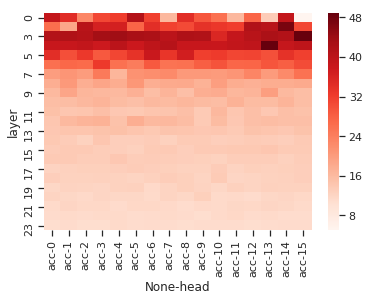

In [49]:
df = get_results(dir_path='../../results/linear_head_wise_results')
df = df.loc[df['model_name'] == 'electra-large-discriminator']
df = df.loc[df['head'] >= 0]
df = df.loc[df['task'] == dict_task[3]] # Choose task
df = df.pivot(index='layer', columns='head', values=['acc'])
display(df)
sns.heatmap(df, cmap='Reds')

# Head Wise Sorted Data Inspection  

위 heatmap을 통해서는 정확하게 얼마나 분포하고 있는지 알기가 힘들기 때문에 sorted 시켜보았다.

In [17]:
plt_cmap = 'plasma'# 'viridis'
subtask_order = ['Length', 'Depth', 'SubjNumber','BigramShift', 'CoordinationInversion', 'OddManOut']
fulltask_order = ['Length', 'Depth', 'SubjNumber', 'CoordinationInversion', 'BigramShift', 'OddManOut']
dir_path = '../../results/linear_head_wise_results'
img_save_path = '../../imgs'

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    data = d.values
    data.sort(axis=1)
    vmin = np.min(data)
    vmax = np.max(data)
    vmin_ = vmin + 0.2*(vmax-vmin)
    vmax_ = vmax #- 0.05*(vmax-vmin) 
    
    d.iloc[:,:] = np.flip(data, 1)
    sns.heatmap(d[::-1], **kwargs, vmin=vmin_, vmax=vmax_)

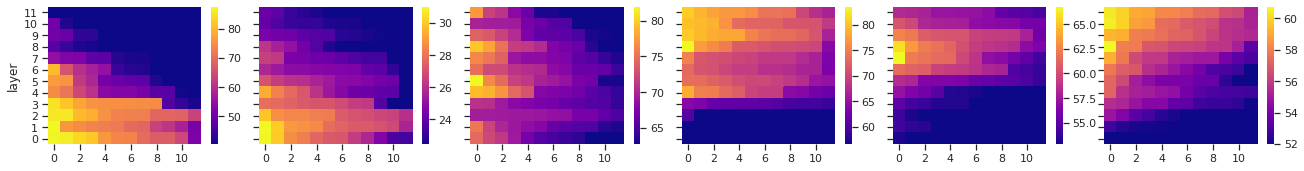

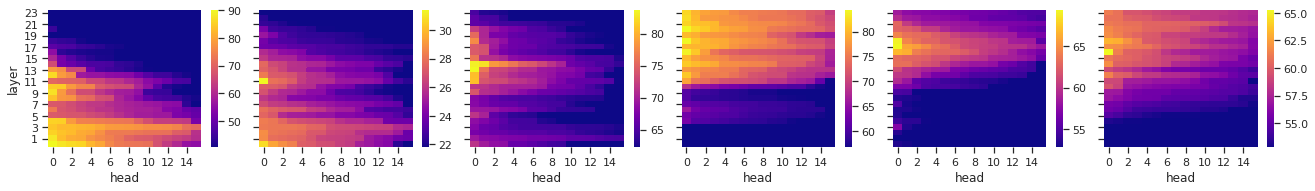

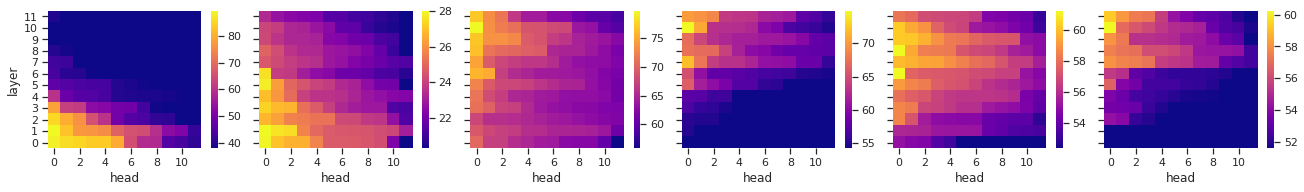

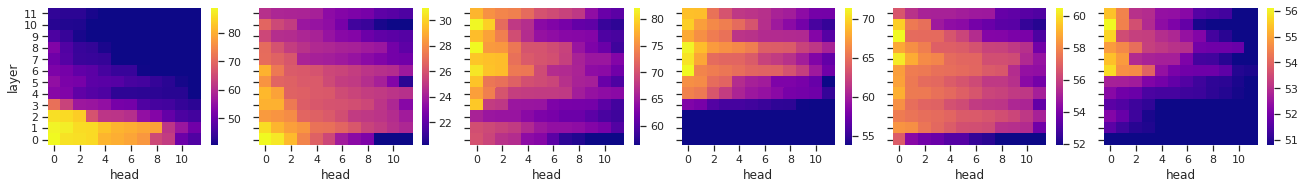

In [22]:
wspace = 0.1
hspace = 0



df = get_results(dir_path=dir_path)
df = df.loc[df['model_name'] == 'bert-base-uncased']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=10, col_order=subtask_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap).fig.subplots_adjust(wspace=wspace, hspace=hspace)
for i, ax in enumerate(fg.axes.flat):
    ax.set_title("") #Times New Roman
    ax.set_xlabel("")
fg.savefig(join(img_save_path, 'fig3_bertbase.svg'), format='svg') #, bbox_inches='tight'

df = get_results(dir_path=dir_path)
df = df.loc[df['model_name'] == 'bert-large-uncased']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=10, col_order=subtask_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap).fig.subplots_adjust(wspace=wspace, hspace=hspace)
for i, ax in enumerate(fg.axes.flat):
    ax.set_title("") #Times New Roman
fg.savefig(join(img_save_path, 'fig3_bertlarge.svg'), format='svg') #, bbox_inches='tight'

df = get_results(dir_path=dir_path)
df = df.loc[df['model_name'] == 'openai-gpt']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=10, col_order=subtask_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap).fig.subplots_adjust(wspace=wspace, hspace=hspace)
for i, ax in enumerate(fg.axes.flat):
    ax.set_title("") #Times New Roman
fg.savefig(join(img_save_path, 'fig3_gpt.svg'), format='svg') #, bbox_inches='tight'

df = get_results(dir_path=dir_path)
df = df.loc[df['model_name'] == 'gpt2']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=10, col_order=subtask_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap).fig.subplots_adjust(wspace=wspace, hspace=hspace)
for i, ax in enumerate(fg.axes.flat):
    ax.set_title("") #Times New Roman
    
fg.savefig(join(img_save_path, 'fig3_gpt2.svg'), format='svg') #, bbox_inches='tight'


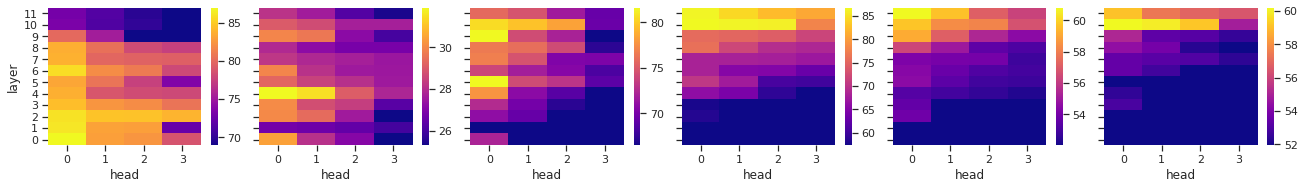

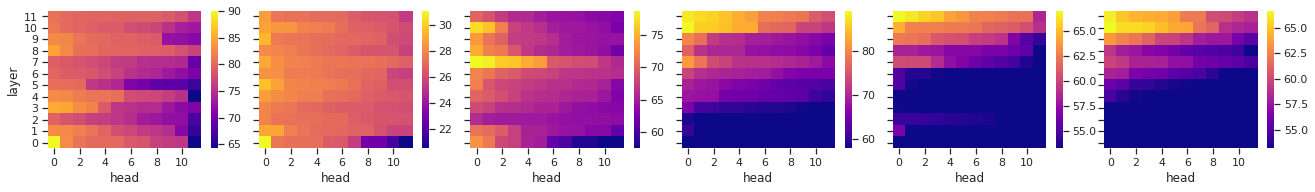

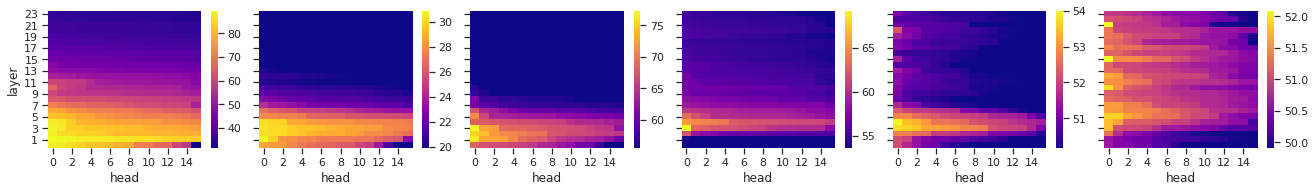

In [21]:
df = get_results(dir_path=dir_path)
df = df.loc[df['model_name'] == 'electra-small-discriminator']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=10, col_order=subtask_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap).fig.subplots_adjust(wspace=wspace, hspace=hspace)
for i, ax in enumerate(fg.axes.flat):
    ax.set_title("") #Times New Roman
fg.savefig(join(img_save_path, 'fig3_electra-small.svg'), format='svg', bbox_inches='tight')

df = get_results(dir_path=dir_path)
df = df.loc[df['model_name'] == 'electra-base-discriminator']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=10, col_order=subtask_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap).fig.subplots_adjust(wspace=wspace, hspace=hspace)
for i, ax in enumerate(fg.axes.flat):
    ax.set_title("") #Times New Roman
fg.savefig(join(img_save_path, 'fig3_electra-base.svg'), format='svg', bbox_inches='tight')

df = get_results(dir_path=dir_path)
df = df.loc[df['model_name'] == 'electra-large-discriminator']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=10, col_order=subtask_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap).fig.subplots_adjust(wspace=wspace, hspace=hspace)
for i, ax in enumerate(fg.axes.flat):
    ax.set_title("") #Times New Roman
fg.savefig(join(img_save_path, 'fig3_electra-large.svg'), format='svg', bbox_inches='tight')

In [28]:
plt_cmap = 'plasma'# 'viridis'

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    data = d.values
    data.sort(axis=1)
    vmin = np.min(data)
    vmax = np.max(data)
    vmin_ = vmin + 0.3*(vmax-vmin)
    vmax_ = vmax - 0.05*(vmax-vmin) 
    
    d.iloc[:,:] = np.flip(data, 1)
    sns.heatmap(d[::-1], **kwargs, vmin=vmin_, vmax=vmax_)

df = get_results(dir_path='./results/linear_head_wise_results')
df = df.loc[df['model_name'] == 'bert-base-uncased']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=3, col_order=task_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap)
fg.fig.suptitle('BERT Base', y=1.02) 
fg.savefig('imgs/A1_bertbase.svg', format='svg', bbox_inches='tight')

df = get_results(dir_path='./results/linear_head_wise_results')
df = df.loc[df['model_name'] == 'bert-large-uncased']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=3, col_order=task_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap)
fg.fig.suptitle('BERT Large', y=1.02) 
fg.savefig('imgs/A1_bertlarge.svg', format='svg', bbox_inches='tight')

df = get_results(dir_path='./results/linear_head_wise_results')
df = df.loc[df['model_name'] == 'openai-gpt']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=3, col_order=task_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap)
fg.fig.suptitle('GPT', y=1.02) 
fg.savefig('imgs/A1_gpt.svg', format='svg')

df = get_results(dir_path='./results/linear_head_wise_results')
df = df.loc[df['model_name'] == 'gpt2']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=3, col_order=task_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap)
fg.fig.suptitle('GPT2', y=1.02) 
fg.savefig('imgs/A_gpt2.svg', format='svg', bbox_inches='tight')


FileNotFoundError: [Errno 2] No such file or directory: './results/linear_head_wise_results'

In [ ]:
plt_cmap = 'plasma'# 'viridis'

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    data = d.values
    #data.sort(axis=1)
    vmin = np.min(data)
    vmax = np.max(data)
    vmin_ = vmin + 0.3*(vmax-vmin)
    vmax_ = vmax - 0.05*(vmax-vmin) 
    
    d.iloc[:,:] = np.flip(data, 1)
    sns.heatmap(d[::-1], **kwargs, vmin=vmin_, vmax=vmax_)

df = get_results(dir_path='./results/linear_head_wise_results')
df = df.loc[df['model_name'] == 'bert-base-uncased']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=3, col_order=task_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap)
fg.fig.suptitle('BERT Base', y=1.02) 
fg.savefig('imgs/A2_unsort_bertbase.svg', format='svg', bbox_inches='tight')

df = get_results(dir_path='./results/linear_head_wise_results')
df = df.loc[df['model_name'] == 'bert-large-uncased']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=3, col_order=task_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap)
fg.fig.suptitle('BERT Large', y=1.02) 
fg.savefig('imgs/A2_unsort_bertlarge.svg', format='svg', bbox_inches='tight')

df = get_results(dir_path='./results/linear_head_wise_results')
df = df.loc[df['model_name'] == 'openai-gpt']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=3, col_order=task_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap)
fg.fig.suptitle('GPT', y=1.02) 
fg.savefig('imgs/A2_unsort_gpt.svg', format='svg')

df = get_results(dir_path='./results/linear_head_wise_results')
df = df.loc[df['model_name'] == 'gpt2']
df = df.loc[df['head'] >= 0]
fg = sns.FacetGrid(df, col='task', col_wrap=3, col_order=task_order)
fg.map_dataframe(draw_heatmap, 'head', 'layer', 'acc', cbar=True, square = False, cmap=plt_cmap)
fg.fig.suptitle('GPT2', y=1.02) 
fg.savefig('imgs/A2_unsort_gpt2.svg', format='svg', bbox_inches='tight')


# Head-Wise Task Pair-plot

In [1]:
df = get_results(dir_path='./linear_head_wise_results')
df = df.loc[df['model_name'] == 'bert-base-uncased']
df = df.loc[df['head'] >= 0]
df = df.pivot_table(index=['layer', 'head'], columns='task', values='acc')
df = df.reset_index()
sns.pairplot(df, hue='layer', vars=['Length',  'WordContent', 'Depth', 'TopConstituents', 'BigramShift', 'Tense', 'SubjNumber', 'ObjNumber', 'OddManOut', 'CoordinationInversion'])

df = get_results(dir_path='./linear_head_wise_results')
df = df.loc[df['model_name'] == 'bert-large-uncased']
df = df.loc[df['head'] >= 0]
df = df.pivot_table(index=['layer', 'head'], columns='task', values='acc')
df = df.reset_index()
sns.pairplot(df, hue='layer', vars=['Length',  'WordContent', 'Depth', 'TopConstituents', 'BigramShift', 'Tense', 'SubjNumber', 'ObjNumber', 'OddManOut', 'CoordinationInversion'])

NameError: name 'get_results' is not defined

# Task-Wise Clustering

In [ ]:
df = get_results(dir_path='./linear_head_wise_results')
df = df.loc[df['model_name'] == 'bert-base-uncased']
df = df.loc[df['location'] == 'head']
df = df.loc[df['head'] >= 0]
    
df2 = get_results(dir_path='./ds_linear_head_wise_results')
df2 = df2.loc[df2['location'] == 'head']
df2 = df2.loc[df2['model_name'] == 'bert-base-uncased']
df2 = df2.loc[df2['head'] >= 0]
df = pd.concat([df, df2])
df = df.loc[df['task'] != 'MRPC']

df = df.pivot_table(index=['layer', 'head'], columns='task', values='acc')
df = df.reset_index().drop(columns=['head', 'layer'])
#df = df[task_order]

df = df.corr(method='spearman')

#sns.heatmap(df, cmap='bwr', center=0, robust=True)
g = sns.clustermap(df, cmap='bwr', figsize=(7,7), center=0)
#g.fig.suptitle('BERT Base') 
g.savefig('imgs/fig5_correlation.svg', format='svg', bbox_inches='tight')

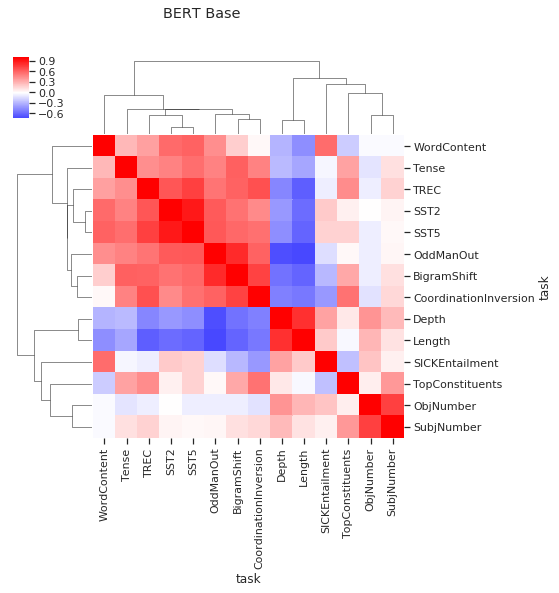

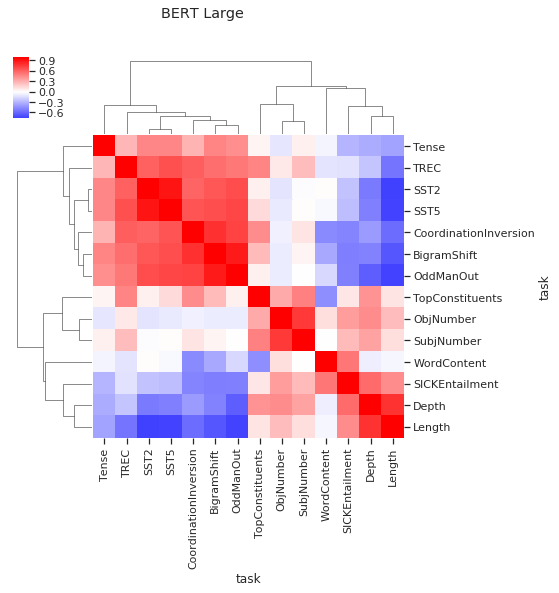

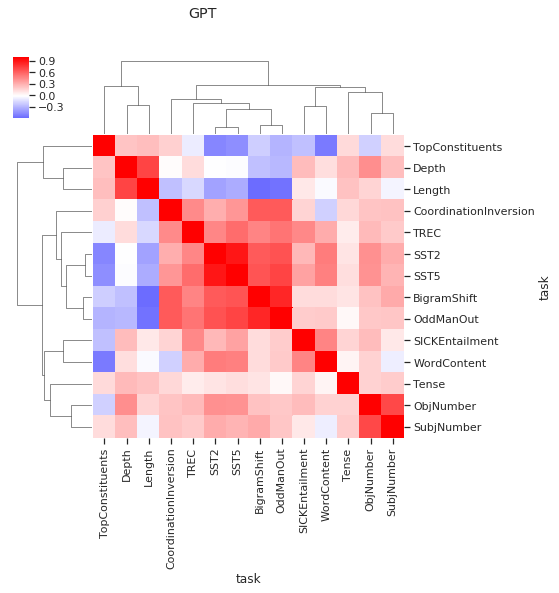

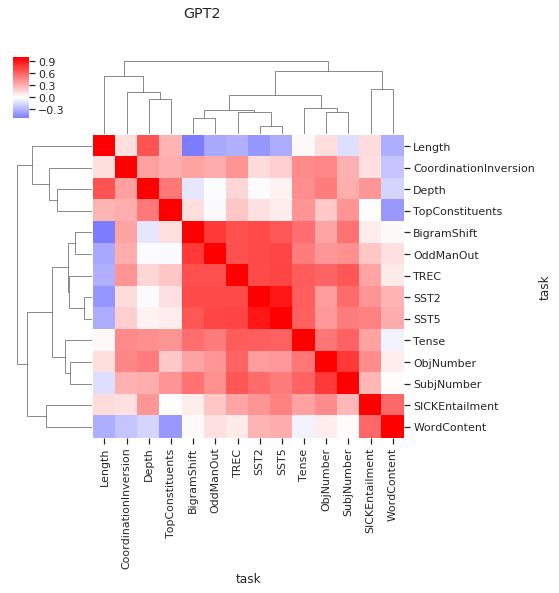

In [12]:
df = get_results(dir_path='./results/linear_head_wise_results')
df = df.loc[df['model_name'] == 'bert-base-uncased']
df = df.loc[df['head'] >= 0]

df2 = get_results(dir_path='./results/ds_linear_head_wise_results')
df2 = df2.loc[df2['location'] == 'head']
df2 = df2.loc[df2['model_name'] == 'bert-base-uncased']
df2 = df2.loc[df2['head'] >= 0]
df = pd.concat([df, df2])
df = df.loc[df['task'] != 'MRPC']

df = df.pivot_table(index=['layer', 'head'], columns='task', values='acc')
df = df.reset_index().drop(columns=['head', 'layer'])
#df = df[task_order]

df = df.corr(method='spearman')

#sns.heatmap(df, annot=True, cmap='bwr', center=0)
g = sns.clustermap(df, cmap='bwr', figsize=(7,7), center=0)
g.fig.suptitle('BERT Base') 
g.savefig('imgs/A3_bertbase.svg', format='svg', bbox_inches='tight')

df = get_results(dir_path='./results/linear_head_wise_results')
df = df.loc[df['model_name'] == 'bert-large-uncased']
df = df.loc[df['head'] >= 0]

df2 = get_results(dir_path='./results/ds_linear_head_wise_results')
df2 = df2.loc[df2['location'] == 'head']
df2 = df2.loc[df2['model_name'] == 'bert-large-uncased']
df2 = df2.loc[df2['head'] >= 0]
df = pd.concat([df, df2])
df = df.loc[df['task'] != 'MRPC']
df = df.pivot_table(index=['layer', 'head'], columns='task', values='acc')
df = df.reset_index().drop(columns=['head', 'layer'])
#df = df[task_order]

df = df.corr(method='spearman')

#sns.heatmap(df, annot=True, cmap='bwr', center=0)
g = sns.clustermap(df, cmap='bwr', figsize=(7,7), center=0)
g.fig.suptitle('BERT Large') 
g.savefig('imgs/A3_bertlarge.svg', format='svg', bbox_inches='tight')

df = get_results(dir_path='./results/linear_head_wise_results')
df = df.loc[df['model_name'] == 'openai-gpt']
df = df.loc[df['head'] >= 0]

df2 = get_results(dir_path='./results/ds_linear_head_wise_results')
df2 = df2.loc[df2['location'] == 'head']
df2 = df2.loc[df2['model_name'] == 'openai-gpt']
df2 = df2.loc[df2['head'] >= 0]
df = pd.concat([df, df2])
df = df.loc[df['task'] != 'MRPC']

df = df.pivot_table(index=['layer', 'head'], columns='task', values='acc')
df = df.reset_index().drop(columns=['head', 'layer'])
#df = df[task_order]

df = df.corr(method='spearman')

#sns.heatmap(df, annot=True, cmap='bwr', center=0)
g = sns.clustermap(df, cmap='bwr', figsize=(7,7), center=0)
g.fig.suptitle('GPT') 
g.savefig('imgs/A3_gpt.svg', format='svg', bbox_inches='tight')

df = get_results(dir_path='./results/linear_head_wise_results')
df = df.loc[df['model_name'] == 'gpt2']
df = df.loc[df['head'] >= 0]

df2 = get_results(dir_path='./results/ds_linear_head_wise_results')
df2 = df2.loc[df2['location'] == 'head']
df2 = df2.loc[df2['model_name'] == 'gpt2']
df2 = df2.loc[df2['head'] >= 0]
df = pd.concat([df, df2])
df = df.loc[df['task'] != 'MRPC']

df = df.pivot_table(index=['layer', 'head'], columns='task', values='acc')
df = df.reset_index().drop(columns=['head', 'layer'])
#df = df[task_order]

df = df.corr(method='spearman')

#sns.heatmap(df, annot=True, cmap='bwr', center=0)
g = sns.clustermap(df, cmap='bwr', figsize=(7,7), center=0)
g.fig.suptitle('GPT2') 
g.savefig('imgs/A3_gpt2.svg', format='svg', bbox_inches='tight')

# Head-wise Similarity Analysis

In [ ]:
from scipy.cluster.hierarchy import linkage

df = get_results(dir_path='./linear_head_wise_results')
df = df.loc[df['model_name'] == 'bert-large-uncased']
df = df.loc[df['head'] >= 0]
df = df.pivot_table(index=['layer', 'head'], columns='task', values='acc')
df_layer = df.index.get_level_values('layer')
lut = dict(zip(df_layer.unique(), sns.color_palette("Blues", len(df_layer.unique()))))
col_colors = pd.Series(df_layer.values).map(lut)


df = df.reset_index().drop(columns=['head', 'layer'])
df = df[task_order]

# ====== Column-wise Normalization ===== #
df=(df-df.mean())/df.std() # std norm
# df=(df-df.min())/(df.max()-df.min())

Z = linkage(df.values, metric='euclidean')
df = df.T.corr(method=euclidean)
# display(df)
g = sns.clustermap(df, cmap='jet', metric='euclidean', standard_scale=1, row_cluster=True, col_cluster=True, col_colors=col_colors, row_colors=col_colors)
col_idx = g.dendrogram_col.reordered_ind
# sns.heatmap(df, cmap='bwr', center=0)

g = sns.clustermap(df, cmap='jet', metric='euclidean', standard_scale=1, row_cluster=False, col_cluster=False, col_colors=col_colors, row_colors=col_colors, row_linkage=Z, col_linkage=Z)



# Head-wise Dimensionality Reduction

In [ ]:
df = get_results(dir_path='./linear_head_wise_results')
df = df.loc[df['model_name'] == 'bert-large-uncased']
df = df.pivot_table(index=['layer', 'head'], columns='task', values='acc')

df = df.reset_index()
df = df.loc[df['head'] >= 0]
layer = df['layer']
df = df.drop(columns=['head', 'layer'])

# ====== Column-wise Normalization ===== #
# df=(df-df.mean())/df.std() # std norm
# df=(df-df.min())/(df.max()-df.min())
# display(df)


# print(layer.values.shape)
X = df.values


X_embedded = TSNE(n_components=2).fit_transform(X)
# X_embedded = PCA(n_components=2).fit_transform(X)
# print(X_embedded.shape)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=layer.values)
plt.legend()

# Average Head Feature

In [4]:
df = get_results(dir_path='./linear_head_wise_results')
df = df.loc[df['model_name'] == 'bert-base-uncased']
df = df.loc[df['head'] >= 0]
df = df.loc[(df['layer'] == 0) | (df['layer'] == 11) | (df['layer'] == 4)]
df = df.pivot_table(index=['layer', 'head'], columns='task', values='acc')

df_avg = df.groupby(level=0).mean()
df = df.sub(df_avg, level=0)

df = df.reset_index() #.drop(columns=['head', 'layer'])
df_task = df[task_order]
df[task_order]=(df_task-df_task.mean())/df_task.std()
df['model_name'] = 'base'
# normalized_df
# display(df)

df2 = get_results(dir_path='./mlp_results')
df2 = df2.loc[df2['model_name'] == 'bert-large-uncased']
df2 = df2.loc[df2['head'] >= 0]
# df2 = df2.loc[(df2['layer'] == 0) | (df2['layer'] == 11) | (df2['layer'] == 4)]
df2 = df2.pivot_table(index=['layer', 'head'], columns='task', values='acc')

df_avg2 = df2.groupby(level=0).mean()
df2 = df2.sub(df_avg2, level=0)

df2 = df2.reset_index() #.drop(columns=['head', 'layer'])
df_task2 = df2[task_order]
df2[task_order]=(df_task2-df_task2.mean())/df_task2.std()
df2['model_name'] = 'large'


# display(df2)

df = df.append(df2)

sns.pairplot(df, hue='model_name', vars=['Length',  'WordContent', 'Depth', 'TopConstituents', 'BigramShift', 'Tense', 'SubjNumber', 'ObjNumber', 'OddManOut', 'CoordinationInversion'])

KeyError: "['location'] not in index"

In [ ]:
df = get_results(dir_path='./linear_head_wise_results')
df = df.loc[df['model_name'] == 'bert-large-uncased']
df = df.loc[df['head'] >= 0]

df = df.pivot_table(index=['layer', 'head'], columns='task', values='acc')
df_avg = df.groupby(level=0).mean()
df = df.sub(df_avg, level=0)

df = df.reset_index()
layer = df['layer']
df = df.drop(columns=['head', 'layer'])

df_task = df[task_order]
# df[task_order]=(df_task-df_task.mean())/df_task.std()
# display(df)

X = df.values
print(X.shape)
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X_embedded = TSNE(n_components=2).fit_transform(X)
# X_embedded = PCA(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=layer.values)
plt.legend()

In [ ]:
df = get_results(dir_path='./linear_head_wise_results')
df = df.loc[df['model_name'] == 'bert-large-uncased']
df = df.loc[df['head'] >= 0]
df = df.pivot_table(index=['layer', 'head'], columns='task', values='acc')

df_avg = df.groupby(level=0).mean()
df = df.sub(df_avg, level=0)

df_layer = df.index.get_level_values('layer')
# print(df_layer.unique())
lut = dict(zip(df_layer.unique(), sns.color_palette("Blues", len(df_layer.unique()))))
col_colors = pd.Series(df_layer.values).map(lut)
# display(df)
# display(col_colors)

df = df.reset_index().drop(columns=['head', 'layer'])
df = df[task_order]

df = df.T.corr(method=euclidean)
# display(df)
sns.clustermap(df, cmap='jet', metric='euclidean', standard_scale=1, row_cluster=True, col_cluster=True, col_colors=col_colors, row_colors=col_colors)
# sns.heatmap(df, cmap='bwr', center=0)
